# Tensorflow로 구현하는 Regression
* Hypothesis : $H(x) = Wx + b$
* Cost : ${cost}(W, b) = \frac{1}{m}\displaystyle\sum_{i=1}^m(H(x^{(i)}) - y^{(i)})^2$

* tf.sqaure() : 제곱
    * tf.sqaure(3) : 9
* tf.reduce_mean() :차원을 줄이면서 평균 계산
    * tf.reduce_mean([1,2,3,4]) => 2.5
* tf.reduce_sum() : 차원을 줄이면서 합 계산
    * tf.reduce_sum([1,2,3,4,5]) : 15

In [1]:
import tensorflow as tf
import numpy as np
x_train = [1,2,3,4,5]
y_train = [1,2,3,4,5]
x_test = [10, 20]
y_test = [10,20]

W = tf.Variable(2.9)   # 임의 값
hypothesis = W * x_train 

err = hypothesis - y_train  # 정답과 차이
sqr_err = tf.square(err)  # 차이 제곱
cost = tf.reduce_mean(sqr_err) # 차원을 1줄이면서 평균 계산

learning_rate = 0.001# 학습 율
gradient =  2/len(x_train) * tf.reduce_sum(err * x_train)
descent = W - learning_rate * gradient
update = W.assign(descent)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("{:^4}\t{:^10}\t{:^10}".format("step", "cost", "W"))
    for step in range(301):
        _, cost_, W_= sess.run([update, cost, W])
        if step % 20 == 0:
            print(f"{step:4}\t{cost_:10.8f}\t{W_:10.8f}")
    


Instructions for updating:
Colocations handled automatically by placer.
step	   cost   	    W     
   0	39.71000290	2.90000010
  20	16.31000519	2.21767306
  40	6.69897604	1.78038311
  60	2.75145602	1.50013232
  80	1.13009942	1.32052505
 100	0.46416205	1.20541799
 120	0.19064471	1.13164854
 140	0.07830308	1.08437097
 160	0.03216117	1.05407166
 180	0.01320955	1.03465354
 200	0.00542554	1.02220881
 220	0.00222843	1.01423323
 240	0.00091528	1.00912178
 260	0.00037594	1.00584602
 280	0.00015441	1.00374663
 300	0.00006343	1.00240123


## Optimizer
경사 하강법 알고리즘을 구현한 옵티마니저(미분계산하여 W,b를 갱신)
* tf.train.GradientDescentOptimizer() 
    * optimizer.minimize(cost)

In [2]:
x_train = [1,2,3,4,5]
y_train = [1,2,3,4,5]
x_test = [10, 20]
y_test = [10,20]

W = tf.Variable(2.9)   # 임의 값
b = tf.Variable(0.5)   # 임의 값
hypothesis = W * x_train + b

err = hypothesis - y_train  # 정답과 차이
sqr_err = tf.square(err)  # 차이 제곱
cost = tf.reduce_mean(sqr_err) # 차원을 1줄이면서 평균 계산

learning_rate = 0.01  # 학습 율
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate) # 경사하강법
train = optimizer.minimize(cost) # 손실 최소화

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("{:^4}\t{:^10}\t{:^10}\t{:^10}".format("step", "cost", "W", "b"))
    for step in range(301):
        _, cost_, W_, b_ = sess.run([train, cost, W, b])
        if step % 20 == 0:
            print(f"{step:4}\t{cost_:10.7f}\t{W_:10.7f}\t{b_:10.7f}")
    


step	   cost   	    W     	    b     
   0	45.6600037	 2.9000001	 0.5000000
  20	 0.0010261	 1.0148665	-0.0204314
  40	 0.0000827	 1.0059403	-0.0212961
  60	 0.0000722	 1.0055153	-0.0199114
  80	 0.0000630	 1.0051539	-0.0186074
 100	 0.0000550	 1.0048001	-0.0173887
 120	 0.0000481	 1.0045010	-0.0162499
 140	 0.0000420	 1.0042062	-0.0151857
 160	 0.0000367	 1.0039307	-0.0141911
 180	 0.0000320	 1.0036732	-0.0132617
 200	 0.0000280	 1.0034328	-0.0123932
 220	 0.0000244	 1.0032079	-0.0115816
 240	 0.0000213	 1.0029979	-0.0108231
 260	 0.0000186	 1.0028015	-0.0101143
 280	 0.0000163	 1.0026180	-0.0094519
 300	 0.0000142	 1.0024465	-0.0088329


## Variable 초기화
* tf.random_noarmal(shape, mean=0.0, stddev=1.0, dtype=float32,seed=None, name=None )
    * 임의의 수를 생성
    * alias of tf.random.normal()

## PlaceHolder
* 모델에 값을 고정하지 않고 실행시에 데이타 교체 가능
* tf.placeholder(dtype, shape=None, name=None)


In [3]:
W = tf.Variable(tf.random_normal([1], seed=1, name='weight')) # alias of tf.random.normal() 
b = tf.Variable(tf.random_normal([1], seed=1, name='bias')) # alias of tf.random.normal()

X = tf.placeholder(tf.float32, name='X') # placeholder for feed_dict
Y = tf.placeholder(tf.float32, name='Y') # tf.placeholder(dtype, shape=None, name=None)placeholder for feed_dict

hypothesis = W* X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
                
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("{:^4}\t{:^10}\t{:^10}\t{:^10}".format("step", "cost", "Weight", "bias"))
    for step in range(201):
        _, cost_, W_, b_ = sess.run([train, cost, W, b], feed_dict={X:x_train, Y:y_train})
        if step % 20 == 0:
            print(f"{step:4}\t{cost_:10.7f}\t{W_}\t{b_}")
    
    print("Test")
    predict = sess.run(hypothesis, feed_dict={X:x_test})
    print(f"X: {x_test}, Y:{y_test}, predict:{predict}")

Instructions for updating:
Use tf.cast instead.
step	   cost   	  Weight  	   bias   
   0	45.5651779	[-0.8113182]	[-0.8113182]
  20	 0.0140728	[1.0658898]	[-0.2710849]
  40	 0.0114783	[1.0695179]	[-0.25113127]
  60	 0.0100241	[1.0650009]	[-0.23467448]
  80	 0.0087541	[1.060744]	[-0.21930549]
 100	 0.0076450	[1.0567659]	[-0.20494299]
 120	 0.0066765	[1.0530483]	[-0.1915211]
 140	 0.0058306	[1.049574]	[-0.17897819]
 160	 0.0050919	[1.0463275]	[-0.16725679]
 180	 0.0044468	[1.0432935]	[-0.15630303]
 200	 0.0038834	[1.0404582]	[-0.14606671]
Test
X: [10, 20], Y:[10, 20], predict:[10.257641 20.660854]


## Cost History Plot

step	   cost   	  Weight  	   bias   
   0	45.5651779	[-0.8113182]	[-0.8113182]
  20	 0.0140728	[1.0658898]	[-0.2710849]
  40	 0.0114783	[1.0695179]	[-0.25113127]
  60	 0.0100241	[1.0650009]	[-0.23467448]
  80	 0.0087541	[1.060744]	[-0.21930549]
 100	 0.0076450	[1.0567659]	[-0.20494299]
 120	 0.0066765	[1.0530483]	[-0.1915211]
 140	 0.0058306	[1.049574]	[-0.17897819]
 160	 0.0050919	[1.0463275]	[-0.16725679]
 180	 0.0044468	[1.0432935]	[-0.15630303]
 200	 0.0038834	[1.0404582]	[-0.14606671]


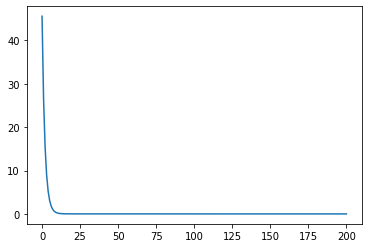

In [5]:
import matplotlib.pyplot as plt

W = tf.Variable(tf.random_normal([1], seed=1, name='weight')) # alias of tf.random.normal() 
b = tf.Variable(tf.random_normal([1], seed=1, name='bias')) # alias of tf.random.normal()

X = tf.placeholder(tf.float32, name='X') # placeholder for feed_dict
Y = tf.placeholder(tf.float32, name='Y') # tf.placeholder(dtype, shape=None, name=None)placeholder for feed_dict

hypothesis = W* X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

hist_cost = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("{:^4}\t{:^10}\t{:^10}\t{:^10}".format("step", "cost", "Weight", "bias"))
    for step in range(201):
        _, cost_, W_, b_ = sess.run([train, cost, W, b], feed_dict={X:x_train, Y:y_train})
        hist_cost.append(cost_)
        if step % 20 == 0:
            print(f"{step:4}\t{cost_:10.7f}\t{W_}\t{b_}")

plt.plot( hist_cost)
plt.show()

## MultiVariable Regression
* tf.matmul(a,b)
    * 행렬곱 연산
    * alias for tf.linalg.matmul(a, b) 
    

In [6]:
import numpy as np
m = 50
x_data = np.ones((m,2), dtype=np.float32)
x_data[:, 0] = np.random.randint(0, 50, (m))
x_data[:, 1] = np.random.randint(0, 50, (m))
#y_data = x_data.T[0] * 0.7 + x_data.T[1] * 0.3 + 50
matmul = tf.matmul(x_data, [[0.7], [0.3]]) + 50
s = tf.Session()
y_data = s.run(matmul)
#y_data = y_data.reshape(-1,1)
print(x_data)
print(y_data)

[[ 9. 42.]
 [28. 11.]
 [24. 45.]
 [35. 15.]
 [30.  0.]
 [47. 21.]
 [45. 12.]
 [47. 48.]
 [17. 17.]
 [29. 37.]
 [ 3.  5.]
 [37. 42.]
 [13. 29.]
 [31. 49.]
 [22. 48.]
 [14. 31.]
 [38.  9.]
 [ 8.  2.]
 [26. 42.]
 [ 8. 15.]
 [17. 36.]
 [18. 38.]
 [ 1. 43.]
 [16. 46.]
 [48. 41.]
 [22. 39.]
 [17. 11.]
 [48.  7.]
 [12. 11.]
 [18. 33.]
 [10. 37.]
 [43. 48.]
 [10. 49.]
 [10.  2.]
 [10. 23.]
 [30. 23.]
 [11. 42.]
 [31. 31.]
 [ 9. 33.]
 [26.  9.]
 [ 3. 19.]
 [13. 36.]
 [29. 48.]
 [28. 41.]
 [22. 23.]
 [ 0. 38.]
 [ 4.  6.]
 [41. 22.]
 [29. 37.]
 [36. 30.]]
[[68.9     ]
 [72.9     ]
 [80.3     ]
 [79.      ]
 [71.      ]
 [89.2     ]
 [85.1     ]
 [97.3     ]
 [67.      ]
 [81.4     ]
 [53.6     ]
 [88.5     ]
 [67.8     ]
 [86.4     ]
 [79.8     ]
 [69.1     ]
 [79.3     ]
 [56.2     ]
 [80.8     ]
 [60.1     ]
 [72.7     ]
 [74.      ]
 [63.6     ]
 [75.      ]
 [95.899994]
 [77.1     ]
 [65.2     ]
 [85.7     ]
 [61.7     ]
 [72.5     ]
 [68.1     ]
 [94.5     ]
 [71.7     ]
 [57.6     ]
 [63.9 

step	   cost   	    W1    	    W2    	   bias   
   0	3299.2180176	[-0.8113182], [1.4845988], 	[-0.8113182]
1000	278.3731384	[1.4219133], [1.0535758], 	[6.0271363]
2000	208.7574768	[1.3251616], [0.9525806], 	[11.9204235]
3000	156.5513611	[1.241377], [0.8651213], 	[17.023882]
4000	117.4009476	[1.168821], [0.78938323], 	[21.443375]
5000	88.0412903	[1.1059893], [0.7237956], 	[25.27056]
6000	66.0237656	[1.0515778], [0.6669977], 	[28.584845]
7000	49.5125389	[1.004459], [0.6178124], 	[31.45492]
8000	37.1304245	[0.9636552], [0.57521886], 	[33.94035]
9000	27.8449116	[0.92832017], [0.5383341], 	[36.092663]
10000	20.8813534	[0.8977201], [0.5063918], 	[37.956562]
11000	15.6593275	[0.8712213], [0.47873092], 	[39.57064]
12000	11.7432718	[0.8482743], [0.45477745], 	[40.96838]
13000	 8.8065090	[0.82840246], [0.43403405], 	[42.178806]
14000	 6.6041570	[0.8111937], [0.4160705], 	[43.22702]
15000	 4.9526048	[0.7962915], [0.40051478], 	[44.13473]
16000	 3.7140441	[0.78338635], [0.38704357], 	[44.920807]


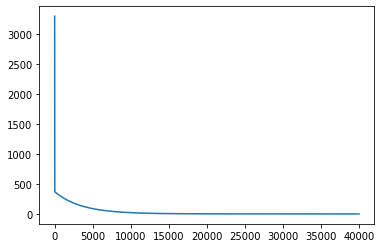

In [11]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal(shape=[2,1], seed=1), name='weight');
b = tf.Variable(tf.random_normal(shape=[1], seed=1), name='bias');

hypothesis = tf.matmul(X, W) + b 

cost= tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0005)
train = optimizer.minimize(cost)
hist_cost = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("{:^4}\t{:^10}\t{:^10}\t{:^10}\t{:^10}".format("step", "cost", "W1","W2", "bias"))
    for step in range(40001):
        _, cost_, W_, b_ = sess.run([train, cost, W, b], feed_dict={X:x_data, Y:y_data})
        if np.isnan(cost_) : break
        hist_cost.append(cost_)
        if step % 1000 == 0:
            print(f"{step:4}\t{cost_:10.7f}\t{W_[0]}, {W_[1]}, \t{b_}")

plt.plot(hist_cost)

## Logistic Regression
* tf.sigmoid(x)
    * $y = 1 / (1 + exp(-x))$
* tf.equal(a, b)
    * alias of tf.math.equal(a, b)
    * a == b 연산 반환, boolean 
* tf.cast(x, dtype)
    * x를 dtype으로 변환
    * alias of tf.dtypes.cast()
    * tf.cast(h > 0.5, tf.float32) : boolean을 float로 변환

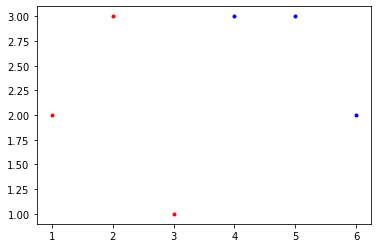

In [12]:
x_data = np.array([[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]])
y_data = np.array([[0],
          [0],
          [0],
          [1],
          [1],
          [1]])
print()
plt.plot(x_data[y_data[:,0]==0][:,0],x_data[y_data[:,0]==0][:,1], '.r')
plt.plot(x_data[y_data[:,0]==1][:,0],x_data[y_data[:,0]==1][:,1], '.b')


In [16]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2,1], seed=1))
b = tf.Variable(tf.random_normal([1], seed=1))

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

#cost = -tf.reduce_mean(Y* tf.log(hypothesis) + (1-Y) * tf.log(1 - hypothesis))
cost = tf.reduce_mean(-Y * tf.log(hypothesis) - (1-Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_, _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
        if np.isnan(cost_) : break
        if step % 1000 == 0:
            print(step, cost_)
    h, p, a = sess.run([hypothesis, predict, accuracy], feed_dict={X:x_data, Y:y_data})
    print('Hypothesis:{}, Predict:{}, Accuracy:{}'.format(h, p, a))



0 1.3484877
1000 0.3482859
2000 0.29158777
3000 0.25547898
4000 0.22705777
5000 0.20406437
6000 0.18516682
7000 0.1694143
8000 0.15611212
9000 0.14474651
10000 0.13493264
Hypothesis:[[0.0248616 ]
 [0.15002549]
 [0.27535784]
 [0.7952063 ]
 [0.94795007]
 [0.9830142 ]], Predict:[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]], Accuracy:1.0


## Softmax
* tf.nn.softmax()
    * tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
* tf.argmax()
    * alias of tf.math.argmax()
    * 가장 큰 값의 인덱스 반환

Text(0.5, 1.0, 'Input')

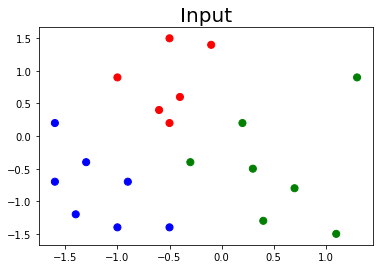

In [17]:
x_data = np.array([[-0.1, 1.4],
              [-0.5, 0.2],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.6, 0.2],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5, 1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-0.7],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5],
              [-1.6,-0.7],
              [-0.5,-1.4],
              [-1.0,-1.4]])
y_label = np.array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])
y_data =  np.eye(3)[y_label]

colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[y_label])
plt.title('Input', size=20)

In [20]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.random_normal([2, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
cost = -tf.reduce_mean(tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        _, cost_ = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
        if step % 100 == 0:
            print(step, cost_)
    
    predict = tf.argmax(hypothesis, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y_label),tf.float32))
    h, p, a = sess.run([hypothesis, predict, accuracy ], feed_dict={X:x_data})
    print("hyppothesis:{}, predict:{}, Accuracy:{}".format(h,p,a))


0 1.5575793
100 0.29901084
200 0.20713294
300 0.17051512
400 0.14827076
500 0.13262074
600 0.12074617
700 0.111299574
800 0.10353367
900 0.09699288
1000 0.091380484
1100 0.08649305
1200 0.08218551
1300 0.07835118
1400 0.074909315
1500 0.071797535
1600 0.06896666
1700 0.06637739
1800 0.06399774
1900 0.061801404
2000 0.059766553
hyppothesis:[[9.94478106e-01 5.51048107e-03 1.13608849e-05]
 [7.61075020e-01 1.52467743e-01 8.64572600e-02]
 [1.51457414e-02 9.84854221e-01 2.37011548e-08]
 [9.14762259e-01 4.36022505e-02 4.16355170e-02]
 [1.28569126e-01 1.02195285e-04 8.71328712e-01]
 [1.28725499e-01 8.70190322e-01 1.08409103e-03]
 [7.96305239e-02 7.16415048e-01 2.03954458e-01]
 [1.12775066e-04 9.99795258e-01 9.19825470e-05]
 [5.76390448e-07 9.99989867e-01 9.58873261e-06]
 [9.91378784e-01 6.13896351e-04 8.00730940e-03]
 [9.99508381e-01 4.65057237e-04 2.65448925e-05]
 [9.39628575e-03 5.54497470e-04 9.90049243e-01]
 [3.81295067e-05 5.68633768e-05 9.99904990e-01]
 [5.99402050e-03 1.07095642e-02 9.8

## Cross Entropy
* tf.nn.softmax_cross_entropy_with_logits_v2(label, logits)
    * logits와 label간의 cross entropy 를 계산

In [214]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.random_normal([2, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        _, cost_ = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
        if step % 100 == 0:
            print(step, cost_)
    
    predict = tf.argmax(hypothesis, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y_label),tf.float32))
    h, p, a = sess.run([hypothesis, predict, accuracy ], feed_dict={X:x_data})
    print("hyppothesis:{}, predict:{}, Accuracy:{}".format(h,p,a))

0 0.84880364
100 0.74218434
200 0.7021619
300 0.6802028
400 0.6657572
500 0.65525895
600 0.6471435
700 0.64060074
800 0.6351632
900 0.63053954
1000 0.6265368
1100 0.62302184
1200 0.619899
1300 0.6170977
1400 0.61456424
1500 0.61225724
1600 0.6101439
1700 0.6081978
1800 0.6063976
1900 0.6047257
2000 0.60316736
hyppothesis:[[9.89403129e-01 1.05224624e-02 7.43781347e-05]
 [7.00156331e-01 1.69128478e-01 1.30715132e-01]
 [2.74371728e-02 9.72562253e-01 5.39275447e-07]
 [8.67827952e-01 6.03612214e-02 7.18109012e-02]
 [1.74934551e-01 3.54161515e-04 8.24711323e-01]
 [1.64240316e-01 8.31831098e-01 3.92862642e-03]
 [9.59060639e-02 6.28302336e-01 2.75791526e-01]
 [3.90437723e-04 9.99063671e-01 5.45988791e-04]
 [4.02795831e-06 9.99912024e-01 8.39045897e-05]
 [9.81912017e-01 1.58295454e-03 1.65050179e-02]
 [9.98615742e-01 1.24459190e-03 1.39626485e-04]
 [1.81065593e-02 1.53551181e-03 9.80357945e-01]
 [1.64201003e-04 2.30477672e-04 9.99605358e-01]
 [1.10237673e-02 1.79378055e-02 9.71038461e-01]
 [1.8